#목표


#데이터 살펴보기


In [1]:
#프로젝트를 진행함에 필요한 모듈을 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#파이널프로젝트_RAW_210329_210926.xlsx 마운팅 후 DataFrame으로 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/미니프로젝트/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


| 컬럼 | 설명 |
| ---- | ----|
| (삭제) id | << 버려도 됨..??? |
| customer_id | 중복있음!! +순수 고객수 파악하려면 전처리 필요 |
| course_id | 어떤 강의 듣는지(빈 값은 폐강으로 추측) |
| type    | 해당 강좌의 현재 결제 진행상태(order는 장바구니, payment가 최종 결제) |
| state                   | type의 진행상황 |
| course_title            | 강의 제목 |
| category_title          | 강의 카테고리 제목 |
| (삭제 보류)format         | 강의 과정 분류 종류|
| completed_at            | 강의 결제 완료 시각|
| transaction_amount      | 실 결제 금액|
| coupon_title            | 쿠폰명|
| coupon_discount_amount  | 할인된 금액|
| sale_price              | 판매 금액|
| (삭제) tax_free_amount    | 면세액 |
| pg                      | 결제대행사 (빈칸은 그 외의 결제대행사)|
| method                  | 결제 방법|
| subcategory_title       | 강의 부 카테고리 제목|
| marketing_start_at      | 해당 강의가 열린날 (일단위로 기록됨)|


____
<유의할 사항>
- 쿠폰 말고도 이벤트같은 다른 조건에 의한 할인도 있다


#데이터 타입과 결측값 확인하기

>결측치 제거

In [4]:
#결측치 확인
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [5]:
# 카테고리가 누락된 강의들은 폐강된 강의들이므로 해당 row를 제거해준다
df = df.dropna(subset=['category_title'])

id는 단순히 자료 처리 순서이므로 삭제한다.

tax_free_amount는 보안상의 이유로 삭제한다.

In [ ]:
# 'id'와'tax_free_amount' 컬럼 제거
df = df.drop(['id','tax_free_amount'],axis = 'columns')
df.head()

>카테고리 컬럼 수정

  <수정 할 목록>
1. 띄어쓰기 차이로 다른 강의로 구분된 '데이터사이언스'와 '데이터 사이언스'를 합쳐준다.
2. 디자인 카테고리에 서브 카테고리로 속해있는 '일러스트' 카테고리를 '디자인'카테고리에 편입시켜준다.
3. '교육','지식콘텐츠','비즈니스','파이낸스','관리' 카테고리는 현재 폐강된 카테고리들로 삭제해준다.

In [ ]:
df['category_title'].value_counts().to_frame()

In [8]:
# 카테고리 변경
df_category = df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
df_category = df_category.replace({'category_title':{'일러스트':'디자인'}})
df_category['category_title'].value_counts().to_frame()


# 불필요한 카테고리 삭제
df_category = df_category[df_category.category_title != '교육']
df_category = df_category[df_category.category_title != '지식콘텐츠']
df_category = df_category[df_category.category_title != '비즈니스']
df_category = df_category[df_category.category_title != '파이낸스']
df_category = df_category[df_category.category_title != '관리']


#웰컴쿠폰 사용자 통합
df_welcome_group = df[(df['coupon_title'].str.contains('웰컴')) | (df['coupon_title'].str.contains('WELCOME'))]




> 순수 결제내역 / 순수 환불내역 분류하기

In [ ]:
# 결제가 완료된 사람의 데이터
df_pc = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]

# 환불이 완료된 사람의 데이터
df_rc =df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]


# 결제가 완료된 사람과 환불이 완료된 사람의 데이터를 합쳐준다.
df_total = pd.merge(df_pc,df_rc,how='outer')



# 합친 데이터 중에서 'customer_id' , 'course_title','coupon_title' 모두를 만족하는 중복값을 가장 최신값만 남기고 제거해준다.
df_total = df_total.drop_duplicates(['customer_id' , 'course_title','coupon_title'],keep = 'last')
df_total['type'].value_counts()

In [10]:
# 중복값을 제거한 df_total 데이터 중 type이 payment면 패캠 이용자들의 순 구매 내역,
df_pay = df_total['type'] == 'PAYMENT'
df_pay = df_total[df_pay]


# type이 refund면 패캠 이용자들의 순 환불 내역이다.
df_refund = df_total['type'] == 'REFUND'
df_refund = df_total[df_refund]


#데이터 분포 확인하기

할인금액

- 얼마 할인해줬을 때, 가장 많은 결제를 이끌어냈는지

- 같은 카테고리기준으로 할인 혜택을 받은 사람과 안받은 사람의 비율



In [19]:
#할인금액 분석에서 사용할 연습용 데이터 프레임 생성
df_onlypay = df_pay[['customer_id','sale_price','transaction_amount','coupon_discount_amount']]

In [20]:
df_onlypay.describe()

,customer_id,sale_price,transaction_amount,coupon_discount_amount
count,51392.000000,5.040600e+04,5.139200e+04,2.372000e+04
mean,416866.248482,1.536335e+05,1.624575e+05,5.494965e+04
std,213400.300865,2.402381e+05,8.904012e+05,6.077120e+04
min,46.000000,1.000000e+00,0.000000e+00,4.950000e+02
25%,178620.500000,1.090000e+05,8.100000e+04,2.000000e+04
50%,503789.000000,1.360000e+05,1.190000e+05,3.000000e+04
75%,577030.500000,1.710000e+05,1.590000e+05,8.900000e+04
max,672308.000000,4.460000e+07,1.134000e+08,2.000000e+06


In [21]:
#계산시 오류나지 않게 transaction_amount를 float값으로 변환
df_onlypay = df_onlypay.astype({'transaction_amount':'float'})

# 얼마 할인받는지 계산
df_onlypay['discounted_amount'] = df_onlypay['sale_price'] - df_onlypay['transaction_amount']


In [ ]:
#NaN값 0.0으로 변경
df_onlypay['coupon_discount_amount'] = df_onlypay['coupon_discount_amount'].replace(np.NaN,0.0)
df_onlypay

In [23]:
#쿠폰 할인외에 이벤트 할인받은 데이터가 있는지 확인

only_coupon = (df_onlypay['coupon_discount_amount'] == df_onlypay['discounted_amount']) & (df_onlypay['discounted_amount'] != 0)
only_coupon.value_counts() 
#쿠폰 할인 받은 사람 : 21901 명  // 쿠폰 못 받은 사람: 29491 


only_event = (df_onlypay['coupon_discount_amount'] != df_onlypay['discounted_amount']) & (df_onlypay['discounted_amount'] != 0)
only_event.value_counts() 
#이벤트 할인 받은 사람 : 4099 명  // 이벤트 할인 못 받은 사람: 47293 


not_discount = (df_onlypay['coupon_discount_amount'] == df_onlypay['discounted_amount']) & (df_onlypay['coupon_discount_amount'] == 0)
not_discount .value_counts()
#할인 못받은 사람: = 25392 명

#할인 받은 사람: 21901 + 4099 = 26000 명 (검산결과 맞음!)

False    26000
True     25392
dtype: int64

구매 기록과 환불기록 분류하기

In [ ]:
# 할인 타입 컬럼 만들기
df_onlypay['discount_type'] = pd.Series()

# 쿠폰 할인을 안받고 구매한 그룹
df_not_discount = df_onlypay[not_discount]
df_not_discount['discount_type']='X'

# 쿠폰 할인을 받고 구매한 그룹
df_coupon = df_onlypay[only_coupon]
df_coupon['discount_type']='coupon'

# 이벤트 할인을 받고 구매한 그룹
df_event = df_onlypay[only_event]
df_event['discount_type']='event'


#할인 타입 합치기
df_onlypay = pd.concat([df_not_discount,df_coupon,df_event])
df_onlypay

>할인 받은 금액에 따라 분류

In [90]:
#할인 받은 금액에 따라 분류하는 함수 만들기
def func(x):
  if x == 0:
    return "not discounted"
  elif x < 10000:
    return "under 10,000"
  elif x < 20000:
    return "more 10,000 ~ under 20,000"
  elif x < 30000:
    return "more 20,000 ~ under 30,000"
  elif x < 40000:
    return "more 30,000 ~ under 40,000"
  elif x < 50000:
    return "more 40,000 ~ under 50,000"
  elif x >= 50000:
    return "over 50,000"
  else:
    return "NaN"

df_onlypay['discount_amount_group'] = (df_onlypay['discounted_amount']).apply(func)

#시각화


In [91]:
df_total_revenue = df_onlypay[['transaction_amount','discount_type','discount_amount_group']]

df_total_revenue.groupby('discount_amount_group')


In [92]:
revenue_classification = df_total_revenue.groupby(by= ['discount_type','discount_amount_group']).sum()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


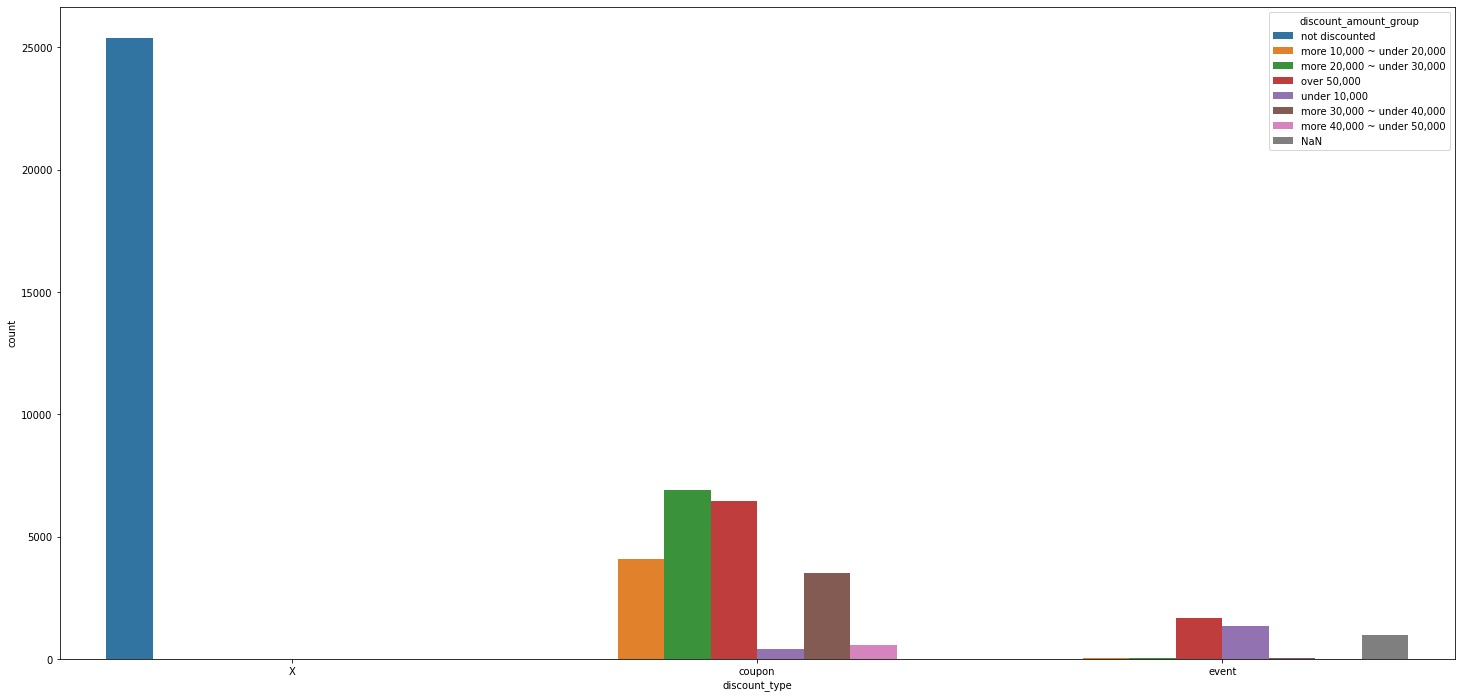

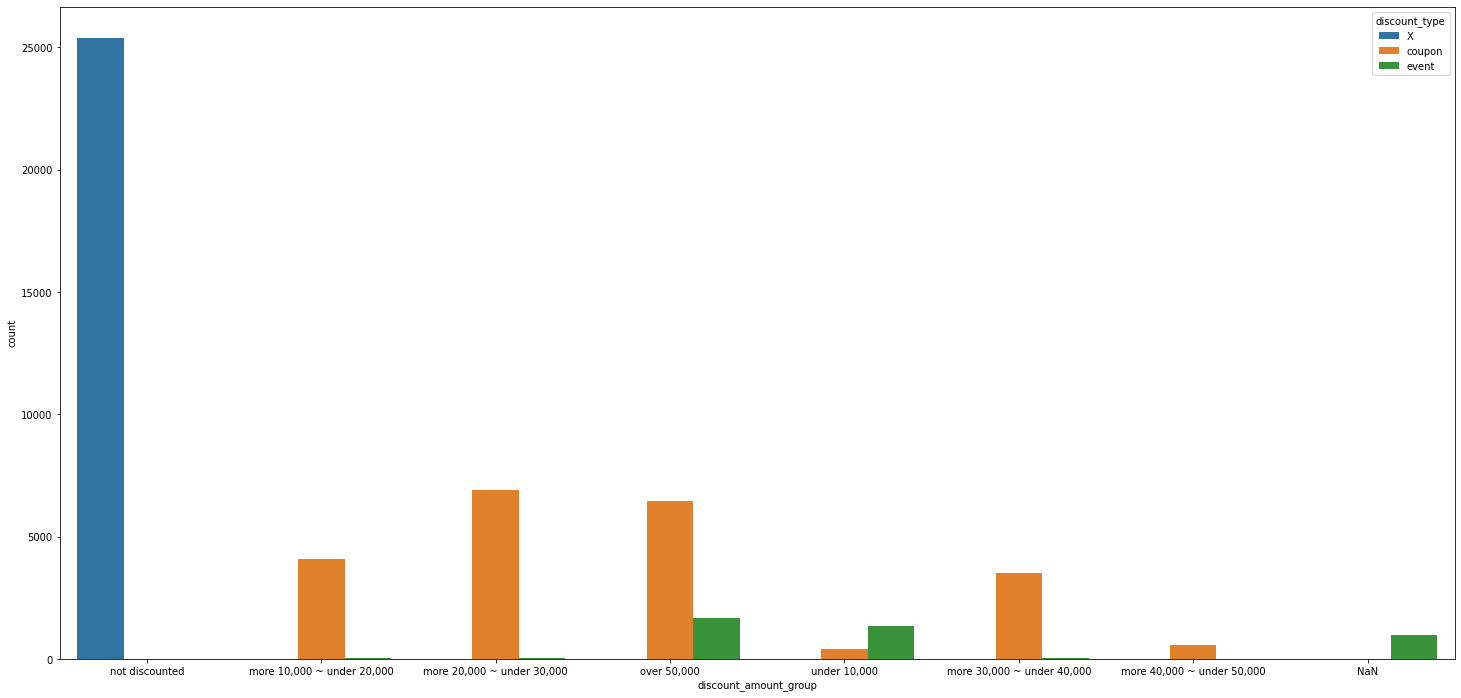

In [101]:
fig = plt.figure(figsize=(25,12))
sns.countplot('discount_type',hue='discount_amount_group', data = df_total_revenue)

fig = plt.figure(figsize=(25,12))
sns.countplot('discount_amount_group',hue='discount_type', data = df_total_revenue)

<Figure size 1800x864 with 0 Axes>

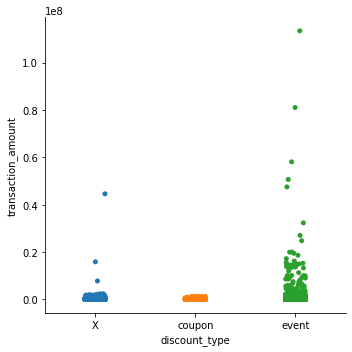

In [98]:
fig = plt.figure(figsize=(25,12))
sns.catplot(x= 'discount_type',y= 'transaction_amount',data = df_total_revenue)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_

<Figure size 864x720 with 0 Axes>

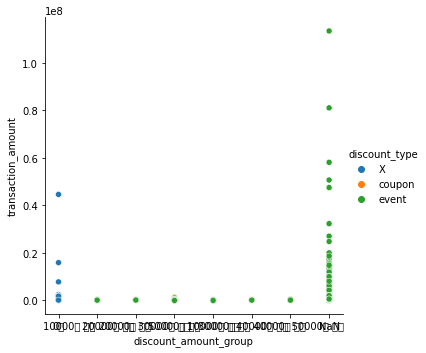

In [86]:
fig = plt.figure(figsize=(12,10))
sns.relplot(x='discount_amount_group',y = 'transaction_amount', hue='discount_type', data=df_total_revenue)

TypeError: ignored

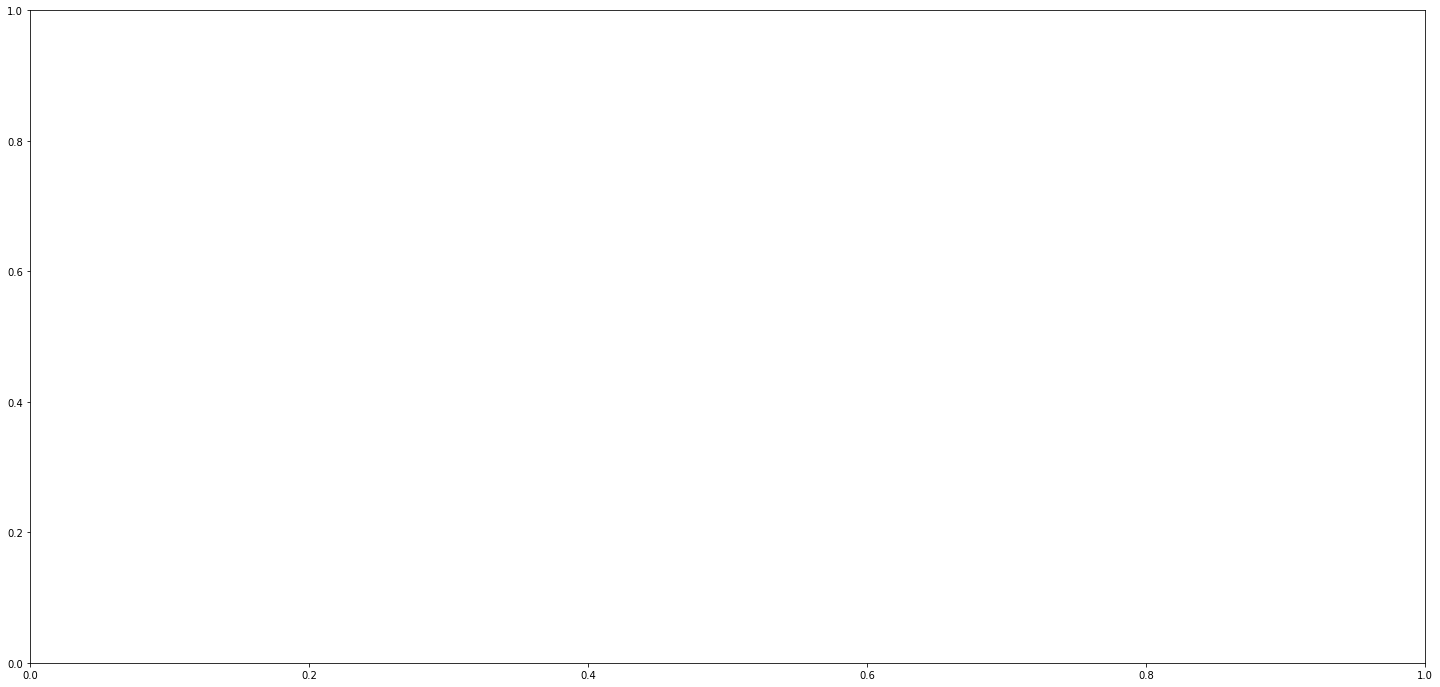

In [99]:
fig = plt.figure(figsize=(25,12))

graph_1 = fig.add_subplot(1,1,1)

sns.kdeplot(df_total_revenue["discount_amount_group"][(df_total_revenue["discount_type"] == 'X')], 
                ax =graph_1, color="blue", shade= True)
sns.kdeplot(df_total_revenue["discount_amount_group"][(df_total_revenue["discount_type"] == 'coupon')], 
                ax =graph_1, color="green", shade= True)
sns.kdeplot(df_total_revenue["discount_amount_group"][(df_total_revenue["discount_type"] == 'event')], 
                ax =graph_1, color="red", shade= True)


graph_1.set_xlabel("discount_amount_group")
graph_1.set_ylabel("Frequency")
graph_1.legend(["not discount","by coupon","by event"])

In [ ]:
#그룹바이 사용해서 할인타입별로 묶기 >> 할인 타입별 1.매출 2.구매량 3. 구매 금액? 시각화 
df_onlypay.groupby(by=['discount_type','discount_amount_group'], as_index=False).sum()

할일:

discount_amount를 그룹 나누기 >> 그룹별 결제 횟수 시각화하기

카테고리별로 그룹 나누기 >> 할인 혜택 (쿠폰,이벤트 분류), 안받은사람 결제 비율 시각화

----

웰컴 할인쿠폰로 구매한 사람들 그룹화 >> customer_id 뽑아내서 웰컴 쿠폰 사용내역을 제외한 기록 분류 >> 할인쿠폰 유입 사람수 와 다음에 쿠폰 있/없이 구매한 사람들의 비율을 각각 구하기

결제 대행사별 그룹화 >> 일단 보류

재결제율

- 웰컴 할인쿠폰을 받은 사람 중 재결제한사람(신규 유입에 쿠폰의 영향?)

- 동일한 결제 수단으로 결제 여부

>최적의 가성비 할인율은 얼마?

판매 금액의 얼마정도를 할인했을 때 결제율이 상승하는지, 할인율을 10% 단위로 분류해서 비교

<추가 분석>

1. 장바구니에서 최종 결제까지 가기에 할인쿠폰/이벤트가 영향을 주는가?

2. 해비 유저와 라이트 유저 (평균값 기준으로 구분) 둘 중 누구에게 할인쿠폰/이벤트의 영향이 큰지 >> 두 그룹 중 어느 그룹이 매출에 큰 영향을 끼치는지